<h3 style='text-align: right;'> Geophysics Independent Project </h3>

## Notebook 1: An intro to seismic data

These notebooks are designed to help you learn how to process and analyse seismic data. This notebook is just an intro to get you started.  You will
- Read and plot seismic data

In later notebooks, you will 
- Download, filter, and plot seismic data
- Search for available seismic data
- Analyse properties of different seismic sources
- Manage additional datasets and subtleties
- Search for and quantify patterns and relationships

Note that you can understand these analyses at a range of levels.  In a first pass, you may wish to just run the cells and briefly note what's going on.  But later you'll want to write similar code, so you'll want to develop a deeper understanding that you can use.

## 1. Load the relevant software packages

In [1]:
# The first step in most analysis is to load various packages
import numpy as np
import obspy
import matplotlib.pyplot as plt

Much of our analysis will use the software package ObsPy (https://docs.obspy.org/), which is a set of open-source tools for analysing seismic data.  There's loads of information about obspy on their website, as obspy is widely used by seismologists.  There are tutorials for most things you'd like to do (https://docs.obspy.org/tutorial/index.html).  We'll give a basic introduction here, but as you want to do more specific things, be sure to check the tutorials or just google your question.  There's a large enough obspy community that often someone else has wanted to do the same thing and posted an explanation.

## 2. Read and plot some seismograms

Our first step will be to read and plot a few seismograms.  You should have a few files named example_seismogram_?.mseed.  These files are in a miniseed format, which is a common way to store seismic data, organised by station, channel, and time.   Make sure the files are in your current directory, and let's read the waveforms.

In [3]:
# we can read everything that has a particular name format,
# using the wildcard *
st = obspy.read('example_seismogram*.mseed')

# or we can read each file and combine them
st1 = obspy.read('example_seismogram_1.mseed') 
st2 = obspy.read('example_seismogram_2.mseed')
st = st1+st2

# print a bit of info about the waveforms
print(st)

2 Trace(s) in Stream:
II.NNA.00.BHZ  | 2024-01-12T13:00:08.019538Z - 2024-01-12T13:10:07.994538Z | 40.0 Hz, 24000 samples
II.KAPI.00.BHZ | 2024-01-22T04:02:20.019538Z - 2024-01-22T04:12:19.994538Z | 40.0 Hz, 24000 samples


The object "st" here is an obspy "Stream," which is a collection of "Traces."  Each trace is just the recording on an individual channel at a particular instrument, for some time period.  Let's look at some information about the first trace.

In [9]:
# grab out the first trace
# recall that Python indexing starts with 0
tr = st[0]

# print some information about it
print('Printing some summary information')
print('Check out the station name, the time interval, the sampling rate, and the length of the record')
print(tr)

Printing some summary information
Check out the station name, the time interval, the sampling rate, and the length of the record
II.NNA.00.BHZ | 2024-01-12T13:00:08.019538Z - 2024-01-12T13:10:07.994538Z | 40.0 Hz, 24000 samples


The trace, which we've called tr, is a Python object with some particular properties defined by Obspy.  For instance, the trace contains some data, which we can access at tr.data:

In [10]:
print(tr.data)

[ -1.24704199e-07  -1.26415160e-07  -1.24709262e-07 ...,   7.64476284e-08
   8.22922018e-08   7.53777404e-08]


The trace also has some statistics about itself, contained in tr.stats.  We can access that information as below.

In [12]:
# and let's look at some more information in detail
# the trace contains "stats", which is a dictionary of further information
print('\nPrinting further information, contained in tr.stats')
print(tr.stats)

# perhaps we just want to know the station where this trace was recorded
print('\nThis station: ',tr.stats.station)


Printing further information, contained in tr.stats
         network: II
         station: NNA
        location: 00
         channel: BHZ
       starttime: 2024-01-12T13:00:08.019538Z
         endtime: 2024-01-12T13:10:07.994538Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 24000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 48, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 196608})

This station:  NNA


Q1: Write some code that prints the start time of the data in this first trace.

In [13]:
print('Your code here')

Your code here


Other parameters of interest  are
- station: the station where this trace was recorded
- network: the network that includes this station
- channel: the channel we're recording on---often to indicate whether we're looking at the east, north, or upward component of ground displacement (more on channel naming later)
- location: this indicates some subtleties of the channels, but often it's not of interest
- starttime and endtime : the beginning and end of the recorded data
- sampling_rate: the number of observations of ground displacement or velocity per second
- delta: 1 over the sampling_rate, the time between observations
- npts: the total number of observations in this seismogram

Q2: Grab the second trace.  Write some code that prints the number of data points recorded per second in this trace.

In [14]:
print('Your code here')

Your code here


Now let's plot the data from the first trace. It's a recording from a M5.2 earthquake in Peru.  The first burst of energy is the P arrival, and the second burst is the S arrival.  The plot shows the ground velocity in m/s as a function of time.  (We'll discuss units in the next notebook.)

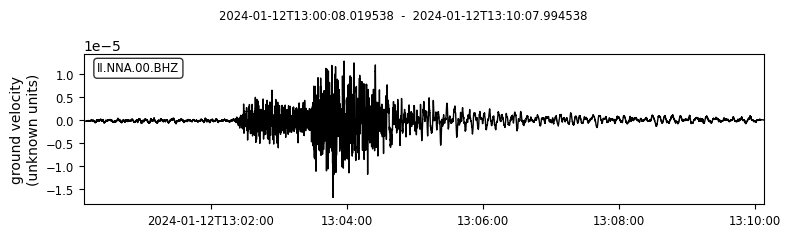

In [36]:
h=st[0].plot(handle=True);
h.gca().set_ylabel('ground velocity\n(unknown units)');

But maybe we don't want to plot the whole seismogram.  How about just plotting the P arrival?  We can specify the start and end times.  

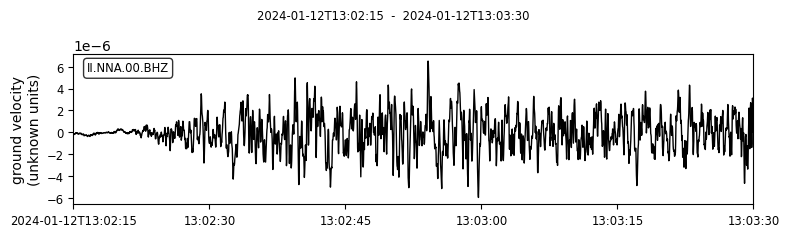

In [35]:
h=st[0].plot(starttime=obspy.UTCDateTime(2024,1,12,13,2,15),endtime=obspy.UTCDateTime(2024,1,12,13,3,30),handle=True);
h.gca().set_ylabel('ground velocity\n(unknown units)');

Note that the starttime here was specified with 6 inputs to the function obspy.UTCDateTime.   obspy.UTCDateTime creates a date/time object that you can manipulate and pass to other function. The inputs to UTCDateTime are the year, month, day, hour, minute, and second.

Let's plot some more data.

Q3: Plot the second trace (st[1]), which records a M5 earthquake in Indonesia. Note that here you mostly see the P arrival and the surface wave, not the S wave.  Make another plot that just includes the P arrival.

In [19]:
print('Your code to plot the full second trace here')

print('Your code to plot the P arrival of the second trace here')

Your code to plot the full second trace here
Your code to plot the P arrival of the second trace here


You'll likely have noticed by now that both traces and streams are objects that contain (1) values (like "data" or "stats") and (2) functions (like "plot.")

To access the values in a trace tr, you type tr.data or tr.stats.  Note that you can assign the values to other variables if you like.  You might want to manipulate them.  For instance, lets grab out the data from the first trace and multiply it by 10.



In [24]:
# grab the data
data=st[0].data

# or alternatively
tr=st[0]
data=tr.data

# print the first 5 values
print(data[0:5])

# multiply the data times 10
data_multiplied=data*10

# print the first 5 values now
print(data_multiplied[0:5])

[ -1.24704199e-07  -1.26415160e-07  -1.24709262e-07  -1.26515190e-07
  -1.24382441e-07]
[ -1.24704199e-06  -1.26415160e-06  -1.24709262e-06  -1.26515190e-06
  -1.24382441e-06]


To access the functions in a stream object, you type st.plot().  If you're used to a functional programming language like Matlab, this is rather like calling plot(st) or plot(tr.data,tr.stats).  

Object-orientated programming tends to make our lives simpler.  When you type st.plot(), the object knows to use the times, data, and parameters it contains as it executes the plotting function.  This way, we don't have to continually pass parameters to a given function.  

You can, of course, still pass some parameters.   For instance, you passed the start and end times to st.plot in the code above.

#### NB: Remember "help." 
You don't have to memorize all the parameters that a function calls.  If you want to know what you need to pass to a particular function, just use Python's help command.

In [26]:
help(st.plot)

Help on method plot in module obspy.core.stream:

plot(*args, **kwargs) method of obspy.core.stream.Stream instance
    Create a waveform plot of the current ObsPy Stream object.
    
    :param outfile: Output file string. Also used to automatically
        determine the output format. Supported file formats depend on your
        matplotlib backend. Most backends support png, pdf, ps, eps and
        svg. Defaults to ``None``.
    :param format: Format of the graph picture. If no format is given the
        outfile parameter will be used to try to automatically determine
        the output format. If no format is found it defaults to png output.
        If no outfile is specified but a format is, than a binary
        imagestring will be returned.
        Defaults to ``None``.
    :param starttime: Start time of the graph as a
        :class:`~obspy.core.utcdatetime.UTCDateTime` object. If not set
        the graph will be plotted from the beginning.
        Defaults to ``None``.
   